In [1]:
import datetime as dt

import numpy as np
import pandas as pd

# DataFrame

In [ ]:
# Aanmaken via dict
dummy_df = pd.DataFrame({
    "int": [1, 2, 3, 4],
    "float": [1.1, 2.2, 3.3, 4.4],
    "str": list("ABCD"),
})
dummy_df

In [ ]:
# Of via lijst met records + columns
dummy_df = pd.DataFrame(
    data=(
        (1, 1.1, "A"),
        (2, 2.2, "B"),
        (3, 3.3, "C"),
        (4, 4.4, "D"),
    ),
    columns=["int", "float", "str"],
    index=["a", "b", "c", "d"],
)
dummy_df

In [ ]:
# Meestal lees je een data bestand in
pd.read_csv("dummy_data/delimited_data.tsv", sep="\t")

# Selecties maken

In [ ]:
# Selecteer een enkele kolom
dummy_df["int"]

In [ ]:
type(dummy_df["int"])

In [ ]:
# Selecteer meerdere kolommen
# Merk op: Gebruik een lijst tussen de haken
dummy_df[["int", "float"]]

In [ ]:
# Met een lijst krijg je een DataFrame, ook met 1 kolom!
print(type(dummy_df[["int"]]))
dummy_df[["int"]]

In [ ]:
# Je kunt niet indexeren zoals bij een Series
# Merk op: label wordt gezien als kolom...
dummy_df["a"]

In [ ]:
# Rijen selecteren via een slice.
# Merk op: Selectie is exclusief rij 2.
dummy_df[0:2]

In [ ]:
# Of met index labels.
# Merk op: Selectie inclusief rij "b"!
dummy_df["a":"b"]

In [ ]:
# Rijen selectie via booleans
mask = [True, False, True, False]
dummy_df[mask]

In [ ]:
# Conditionele selectie
# Mark op: mask = [True, True, False, False]
mask = dummy_df["int"] < 3
dummy_df[mask]

In [ ]:
# Of op 1 regel...
dummy_df[dummy_df["int"] < 3]

In [ ]:
# Rijen selecteren via .query() methode
dummy_df.query("int < 3")

In [ ]:
# Combinatie van condities
dummy_df.query("int < 3 | str in ('A', 'C')")

In [ ]:
# Selectie van rijen en kolommen met .loc[]
# Merk op: Loc werkt met labels voor zowel rijen als kolommen!
dummy_df.loc[
    # rijen, [kolommen]
    "a":"b", ["int", "float"]
]

In [ ]:
# Met .iloc[] kun je positionele selectie maken
# Merk op: Zowel rijen als kolommen *moeten* positioneel...
dummy_df.iloc[0:2, [0, 1]]

In [ ]:
# Alternatief: gebruik twee stappen
dummy_df[0:2][["int", "float"]]

### Samenvatting selecties

**Kolommen selecteren**

- `df[<str>]`        => Selecteert 1 kolom als `pandas.Series`.
- `df[[<str>]]`      => Selecteert 1 of meer kolommen als `pandas.DataFrame`.

**Rijen selecteren**

- `df[<slice>]`      => Selecteert enkele rijen en alle kolommen als `pandas.DataFrame`.
- `df.query(<str>)`  => Selecteerd rijen die voloen aan de query als `pandas.DataFrame`.

**Rijen en kolommen selecteren**

- `df.loc[<slice>, <list>]`  => Selectert rijen en kolommen als `pandas.DataFrame`.
- `df.iloc[<slice>, <list>]`  => Idem maar dat op basis van positie in de index.

# Descriptieve statistieken

In [2]:
# Dummy data
dummy_df = pd.DataFrame({
    "int": [1, 2, 3, 4],
    "float": [1.1, 2.2, 3.3, 4.4],
    "str": list("ABCD"),
})
dummy_df

,int,float,str
0,1,1.1,A
1,2,2.2,B
2,3,3.3,C
3,4,4.4,D


In [ ]:
# Vorm van het DataFrame: (rijen, kolommen)
dummy_df.shape

In [ ]:
# Index is beschikbaar via .index
dummy_df.index

In [3]:
# Kolommen via .columns
# Merk op: Ook de kolommen zitten in een Index object!
dummy_df.columns

Index(['int', 'float', 'str'], dtype='object')

In [4]:
dummy_df.dtypes

int        int64
float    float64
str       object
dtype: object

In [5]:
{
    name: dtype
    for name, dtype in zip(dummy_df.columns, dummy_df.dtypes)
}

{'int': dtype('int64'), 'float': dtype('float64'), 'str': dtype('O')}

In [ ]:
# Ook DataFrame heeft .describe() methode
# Merk op: Standaard alleen de numerieke kolommen
dummy_df.describe()

In [ ]:
# Met include kun je aangeven welke data types opgenomen worden.
# Voorbeelden: "number", "object", "category".
# Merk op: Voor categorische data veranderen de statistieken.
dummy_df.describe(include=["object"])

In [ ]:
# Totalen per kolom
# Merk op: De som van str is samenvoeging waardes
dummy_df.sum()

In [ ]:
# Beter om eerst de numerieke kolommen te selecteren
dummy_df[["int", "float"]].mean()

In [ ]:
dummy_df

In [ ]:
# Gebruik axis argument om rij totalen te krijgen.
# Merk op: axis=0 sommeert rijen en axis=1 sommeert kolommen.
dummy_df[["int", "float"]].sum(axis=1)

In [ ]:
# Met .info() krijg je meer systeem informatie.
dummy_df.info()

In [ ]:
# Geheugen gebruik is standaard zonder categorische data!
# Gebruik memory_usage="deep" om exacte gebruik te zien.
# Merk op: gebruik is van 300+ naar 700 bytes gegaan.
dummy_df.info(memory_usage="deep")

# Kolommen aanmaken / verwijderen

In [6]:
def maak_scores():
    return pd.DataFrame({
        "id": ["a", "b", "c", "d"],
        "score": [4, 6, 9, 8],
    })

scores = maak_scores()
scores

,id,score
0,a,4
1,b,6
2,c,9
3,d,8


In [7]:
# Je kunt waardes direct toekennen aan een kolom.
# Merk op: Originele DataFrame is gewijzigd (in place)!
scores["voldoende"] = scores["score"] > 5.5
scores

,id,score,voldoende
0,a,4,False
1,b,6,True
2,c,9,True
3,d,8,True


In [9]:
# Reset scores
scores = maak_scores()
scores

,id,score
0,a,4
1,b,6
2,c,9
3,d,8


In [10]:
def aantal_voldoendes(df):
    df["voldoende"] = df["score"] > 5.5
    return df["voldoende"].sum()


# Gebruiker wil alleen aantal voldoendes weten...
print(aantal_voldoendes(scores))

# Maar krijgt er onverwacht een kolom bij!
scores

3


,id,score,voldoende
0,a,4,False
1,b,6,True
2,c,9,True
3,d,8,True


In [11]:
# Reset scores
scores = maak_scores()

In [12]:
scores

,id,score
0,a,4
1,b,6
2,c,9
3,d,8


In [13]:
# Nettere manier via assign()
scores.assign(voldoende=scores["score"] > 5.5)

,id,score,voldoende
0,a,4,False
1,b,6,True
2,c,9,True
3,d,8,True


In [14]:
# Merk op: Originele DataFrame is nu niet gewijzigd!
scores

,id,score
0,a,4
1,b,6
2,c,9
3,d,8


In [15]:
# Meerdere kolommen tegelijk aanmaken.
# Merk op: Gebruik lambda functie wanneer kolom niet in originele DataFrame zit!
(
    scores
    .assign(

        # Gebaseerd op bestaande kolom.
        geslaagd=scores["score"] > 5.5,
        
        # Gebaseerd op nieuwe kolom (uit vorige stap).
        geslaagd_tekst=lambda df: df["geslaagd"].replace({True: "Geslaagd", False: "Gezakt"}),

    )
)

,id,score,geslaagd,geslaagd_tekst
0,a,4,False,Gezakt
1,b,6,True,Geslaagd
2,c,9,True,Geslaagd
3,d,8,True,Geslaagd


# Functies toepassen

In [16]:
dummy_df = pd.DataFrame({
    "voornaam": ["henk", "INGRID", "Joop"],
    "achternaam": ["jansen", "MAASSEN", "Braak"],
    "leeftijd": [45, 26, 44],
})
dummy_df

,voornaam,achternaam,leeftijd
0,henk,jansen,45
1,INGRID,MAASSEN,26
2,Joop,Braak,44


In [17]:
# Functies op kolommen; identiek aan Series.
dummy_df["voornaam"].map(str.capitalize)

0      Henk
1    Ingrid
2      Joop
Name: voornaam, dtype: object

In [19]:
def print_info(row):
    """Print informatie over een rij"""
    print("Type:    ", type(row))
    print("Index:   ", row.index)
    print("Waardes: ", row.values)
    print("-" * 65)

In [21]:
# Functies op rijen; gebruik apply()
# Merk op: axis=1 geeft aan dat we over kolommen werken
dummy_df.apply(print_info, axis=1)

Type:     <class 'pandas.core.series.Series'>
Index:    Index(['voornaam', 'achternaam', 'leeftijd'], dtype='object')
Waardes:  ['henk' 'jansen' 45]
-----------------------------------------------------------------
Type:     <class 'pandas.core.series.Series'>
Index:    Index(['voornaam', 'achternaam', 'leeftijd'], dtype='object')
Waardes:  ['INGRID' 'MAASSEN' 26]
-----------------------------------------------------------------
Type:     <class 'pandas.core.series.Series'>
Index:    Index(['voornaam', 'achternaam', 'leeftijd'], dtype='object')
Waardes:  ['Joop' 'Braak' 44]
-----------------------------------------------------------------


0    None
1    None
2    None
dtype: object

In [22]:
def volledige_naam(persoon):
    """Genereer volledige naam uit voor en achternaam."""
    voornaam = persoon["voornaam"].strip().capitalize()
    achternaam = persoon["achternaam"].strip().capitalize()
    
    return f"{voornaam} {achternaam}"

In [23]:
# Gebruik apply() om functie op rij toe te passen
dummy_df.apply(volledige_naam, axis=1)

0       Henk Jansen
1    Ingrid Maassen
2        Joop Braak
dtype: object

In [24]:
def volledige_naam(persoon, initialen=False):
    """Genereer volledige naam uit voor en achternaam."""
    achternaam = persoon["achternaam"].strip().capitalize()
    
    if initialen:
        voornaam = persoon["voornaam"][0].upper() + "."
    else:
        voornaam = persoon["voornaam"].strip().capitalize()
    
    return f"{voornaam} {achternaam}"

In [25]:
# Additionele argumenten worden doorgegeven aan de functie
dummy_df.apply(
    volledige_naam,
    axis=1,
    
    # Argument voor volledige_naam()
    initialen=True,
)

0     H. Jansen
1    I. Maassen
2      J. Braak
dtype: object

In [26]:
# Merk op: Functie retourneert dict met meerdere waardes
def naam_opschonen(persoon):
    """Schoon voor en achternaam op."""
    voornaam = persoon["voornaam"].strip().capitalize()
    achternaam = persoon["achternaam"].strip().capitalize()
    
    return {"voornaam": voornaam, "achternaam": achternaam}

In [29]:
# Door result_type "expand" op te geven worden twee kolommen aangemaakt.
# Merk op: Resultaat is nu een DataFrame!
dummy_df.apply(
    naam_opschonen,
    axis=1,
    result_type="expand",
)

,voornaam,achternaam
0,Henk,Jansen
1,Ingrid,Maassen
2,Joop,Braak


In [32]:
# Met applymap() pas je een functie toe op alle waardes in een DataFrame.
# Merk op: De leeftijd kolom is numeriek en wordt daarom uitgesloten.
dummy_df[["voornaam", "achternaam"]].applymap(str.capitalize)

,voornaam,achternaam
0,Henk,Jansen
1,Ingrid,Maassen
2,Joop,Braak


# Groeperen en aggregeren

In [33]:
# Dummy dataset
dummy_df = pd.DataFrame({
    "id": ["a", "b", "c", "d", "e", "f", "g", "h", "i"],
    "stad": ["Amsterdam"] * 3 + ["Utrecht"] * 3 + ["Beek"] * 3,
    "provincie": ["Noord-Holland"] * 3 + ["Utrecht"] * 3 + ["Gelderland"] * 2 + ["Limburg"],
    "leeftijd": [22, 41, 36, 27, 22, 56, 72, 44, 39],
    "score": [8, 7, 4, 9, 6, 7, 6, 8, 7],
})
dummy_df

,id,stad,provincie,leeftijd,score
0,a,Amsterdam,Noord-Holland,22,8
1,b,Amsterdam,Noord-Holland,41,7
2,c,Amsterdam,Noord-Holland,36,4
3,d,Utrecht,Utrecht,27,9
4,e,Utrecht,Utrecht,22,6
5,f,Utrecht,Utrecht,56,7
6,g,Beek,Gelderland,72,6
7,h,Beek,Gelderland,44,8
8,i,Beek,Limburg,39,7


In [34]:
# Met groupby maak je gegroepeerde data aan.
dummy_df.groupby("stad")

In [35]:
# Loop door de groepen
for stad, df in dummy_df.groupby("stad"):
    print("Naam stad: ", stad)
    print(df)
    print("-" * 40)

Naam stad:  Amsterdam
  id       stad      provincie  leeftijd  score
0  a  Amsterdam  Noord-Holland        22      8
1  b  Amsterdam  Noord-Holland        41      7
2  c  Amsterdam  Noord-Holland        36      4
----------------------------------------
Naam stad:  Beek
  id  stad   provincie  leeftijd  score
6  g  Beek  Gelderland        72      6
7  h  Beek  Gelderland        44      8
8  i  Beek     Limburg        39      7
----------------------------------------
Naam stad:  Utrecht
  id     stad provincie  leeftijd  score
3  d  Utrecht   Utrecht        27      9
4  e  Utrecht   Utrecht        22      6
5  f  Utrecht   Utrecht        56      7
----------------------------------------


In [40]:
# Totaal per stad.
# Merk op: stad is de index van het DataFrame.
dummy_df.groupby("stad").sum()

,leeftijd,score
stad,,
Amsterdam,99,19
Beek,155,21
Utrecht,105,22


In [41]:
# Met agg() kun je per kolom aangeven welke aggregatie je wilt.
(
    dummy_df
    .groupby("stad")
    .agg({
        "leeftijd": "mean",
        "score": "sum",
    })
)

,leeftijd,score
stad,,
Amsterdam,33.000000,19
Beek,51.666667,21
Utrecht,35.000000,22


In [48]:
# Je kun een lijst met functies per kolom opgeven
# Dit zorgt wel voor een vervelende MultiIndex voor de kolommen...
(
    dummy_df
    .groupby("stad", as_index=False)
    .agg({
        "leeftijd": ["mean", "std"],
        "score": ["sum", "min", "max"],
    })
)

stad   leeftijd            score        
                   mean        std   sum min max
0  Amsterdam  33.000000   9.848858    19   4   8
1       Beek  51.666667  17.785762    21   6   8
2    Utrecht  35.000000  18.357560    22   6   9

In [45]:
# Betere syntax
tmp = (
    dummy_df
    .groupby("stad", as_index=False)
    .agg(
        leeftijd_gemiddeld=("leeftijd", "mean"),
        leeftijd_deviatie=("leeftijd", "std"),
        score_totaal=("score", "sum"),
        score_minimum=("score", "min"),
        score_maximum=("score", "max"),
    )
)
tmp

,stad,leeftijd_gemiddeld,leeftijd_deviatie,score_totaal,score_minimum,score_maximum
0,Amsterdam,33.000000,9.848858,19,4,8
1,Beek,51.666667,17.785762,21,6,8
2,Utrecht,35.000000,18.357560,22,6,9


In [46]:
tmp["leeftijd_gemiddeld"]

0    33.000000
1    51.666667
2    35.000000
Name: leeftijd_gemiddeld, dtype: float64

In [51]:
(
    dummy_df
    .groupby(["stad", "provincie"], as_index=False)
    .agg({
        "leeftijd": ["mean", "std"],
        "score": ["sum", "min", "max"],
    })
)

stad      provincie leeftijd            score        
                                mean        std   sum min max
0  Amsterdam  Noord-Holland     33.0   9.848858    19   4   8
1       Beek     Gelderland     58.0  19.798990    14   6   8
2       Beek        Limburg     39.0        NaN     7   7   7
3    Utrecht        Utrecht     35.0  18.357560    22   6   9

# DataFrames samenvoegen

## pandas.concat()

Opemrkingen

- Gebruik `pd.concat()` om 2 of meer DataFrames samen te voegen.
- Concat probeert index / kolommen aan elkaar te matchen.

In [52]:
df1 = pd.DataFrame(
    {
        "col_1": [1, 2, 3],
        "col_2": [4, 5, 6],
    },
    index=["a", "b", "c"],
)
df1

,col_1,col_2
a,1,4
b,2,5
c,3,6


In [53]:
# Merk op: Gedeeltelijke overlap tussen index / kolommen.
df2 = pd.DataFrame(
    {
        "col_2": [1, 2, 3],
        "col_3": [4, 5, 6],
    },
    index=["b", "c", "d"],
)
df2

,col_2,col_3
b,1,4
c,2,5
d,3,6


In [54]:
# Concat op basis van index / rijen.
# Scenario: Dezelfde metingen voor verschillende entiteiten.
# Vergelijkbaar met SQL UNION ALL.
#
#
# Merk op:
# - Ontbrekende waardes niet-gedeelde kolommen.
# - Dubbele waardes in de index
pd.concat(
    [df1, df2],
    axis=0,         # alternatief: "index"
)

,col_1,col_2,col_3
a,1.0,4,NaN
b,2.0,5,NaN
c,3.0,6,NaN
b,NaN,1,4.0
c,NaN,2,5.0
d,NaN,3,6.0


In [55]:
# Concat op basis van kolommen.
# Scenario: Verschillende metingen voor dezelfde entiteiten
#
# Merk op:
# - Indices worden uitgelijnd.
# - Ontbrekende waardes voor niet-gedeelde indices.
# - col_2 zit er dubbel in!
pd.concat(
    [df1, df2],
    axis=1         # alternatief: "columns"
)

,col_1,col_2,col_2,col_3
a,1.0,4.0,NaN,NaN
b,2.0,5.0,1.0,4.0
c,3.0,6.0,2.0,5.0
d,NaN,NaN,3.0,6.0


In [57]:
# Gebruik join parameter om alleen gedeelde rijen te krijgen.
# Merk op: standaard staat join op "outer".
pd.concat(
    [df1, df2],
    axis="columns",
    join="inner",
)

,col_1,col_2,col_2,col_3
b,2,5,1,4
c,3,6,2,5


## DataFrame.join()

Opmerkingen:

- Met `join()` voeg je 2 DataFrames samen.
- Koppeling standaard op basis van indices.

In [58]:
# Merk op: Foutmelding vanwege dubbele kolom (col_2)
df1.join(df2)

ValueError: columns overlap but no suffix specified: Index(['col_2'], dtype='object')

In [59]:
# Geef (tenminste een) achtervoegsel op om fout te verhelpen
df1.join(df2, rsuffix="_right")

,col_1,col_2,col_2_right,col_3
a,1,4,NaN,NaN
b,2,5,1.0,4.0
c,3,6,2.0,5.0


Types koppelingen:

- `left`: linker DataFrame bepaalt welke rijen meekomen (standaard).
- `right`: rechter DataFrame bepaalt welke rijen meekomen.
- `inner`: alleen gedeelde rijen komen mee.
- `outer`: alle rijen komen mee.
- `cross`: cartesiaans product van de rijen.

Merk op: vergelijkbaar met de standaard SQL JOIN types.

In [62]:
# Voorbeeld van outer join
df1.join(df2, rsuffix="_right", how="outer")

,col_1,col_2,col_2_right,col_3
a,1.0,4.0,NaN,NaN
b,2.0,5.0,1.0,4.0
c,3.0,6.0,2.0,5.0
d,NaN,NaN,3.0,6.0


## DataFrame.merge()

Opmerkingen:

- De `merge()` methode biedt meer opties dan `join()`.
- Gebruik `merge()` tenzij je koppelt op indices.




In [63]:
left = pd.DataFrame({
    "naam": ["Henk", "Ingrid", "Henk"],
    "plaats": ["Amsterdam", "Amsterdam", "Rotterdam"],
    "leeftijd": [24, 56, 33],
})
left

,naam,plaats,leeftijd
0,Henk,Amsterdam,24
1,Ingrid,Amsterdam,56
2,Henk,Rotterdam,33


In [64]:
right = pd.DataFrame({
    "naam": ["Henk", "Ingrid", "Henk", "Sanne"],
    "plaats": ["Amsterdam", "Amsterdam", "Rotterdam", "Rotterdam"],
    "score": [4, 5, 6, 7],
})
right

,naam,plaats,score
0,Henk,Amsterdam,4
1,Ingrid,Amsterdam,5
2,Henk,Rotterdam,6
3,Sanne,Rotterdam,7


In [65]:
# Merge door gebruik te maken van naam kolom.
# Merk op:
# - Dubbele rijen voor dubbele namen (Henk).
# - Automatisch _x en _y voor dubbele kolommen (plaats).
left.merge(right, on="naam", how="left")

,naam,plaats_x,leeftijd,plaats_y,score
0,Henk,Amsterdam,24,Amsterdam,4
1,Henk,Amsterdam,24,Rotterdam,6
2,Ingrid,Amsterdam,56,Amsterdam,5
3,Henk,Rotterdam,33,Amsterdam,4
4,Henk,Rotterdam,33,Rotterdam,6


In [66]:
# Merge op basis van meerdere kolommen (naam + plaats)
# Merk op: Geen dubbele rijen en kolommen meer.
left.merge(right, on=["naam", "plaats"], how="left")

,naam,plaats,leeftijd,score
0,Henk,Amsterdam,24,4
1,Ingrid,Amsterdam,56,5
2,Henk,Rotterdam,33,6


In [67]:
# Gebruik validate om koppeling te controleren.
# Geldige waardes zijn "1:1", "1:m", "m:1" en "m:m".
left.merge(right, on=["naam", "plaats"], validate="1:1")

,naam,plaats,leeftijd,score
0,Henk,Amsterdam,24,4
1,Ingrid,Amsterdam,56,5
2,Henk,Rotterdam,33,6


In [68]:
# Foutmelding als alleen op naam gekoppeld wordt vanwege duplicaten.
left.merge(right, on="naam", validate="1:1")

MergeError: Merge keys are not unique in either left or right dataset; not a one-to-one merge

In [69]:
# Met indicator krijg je een _merge kolom met de bron voor de rij.
left.merge(right, on=["naam", "plaats"], how="outer", indicator=True)

,naam,plaats,leeftijd,score,_merge
0,Henk,Amsterdam,24.0,4,both
1,Ingrid,Amsterdam,56.0,5,both
2,Henk,Rotterdam,33.0,6,both
3,Sanne,Rotterdam,NaN,7,right_only


# Melt en pivot

In [70]:
df = pd.DataFrame(
    {
        "Temperatuur": [11.2, 15.3, 14.8, 12.5, 10.5],
        "Zonuren": [5.5, 7.5, 6.8, 5.6, 4.6],
        "Neerslag": [3.5, 0.5, 0.0, 0.0, 3.4],
    },
    index=pd.date_range("2022-3-1", "2022-3-5")
)
df

,Temperatuur,Zonuren,Neerslag
2022-03-01,11.2,5.5,3.5
2022-03-02,15.3,7.5,0.5
2022-03-03,14.8,6.8,0.0
2022-03-04,12.5,5.6,0.0
2022-03-05,10.5,4.6,3.4


<AxesSubplot:>

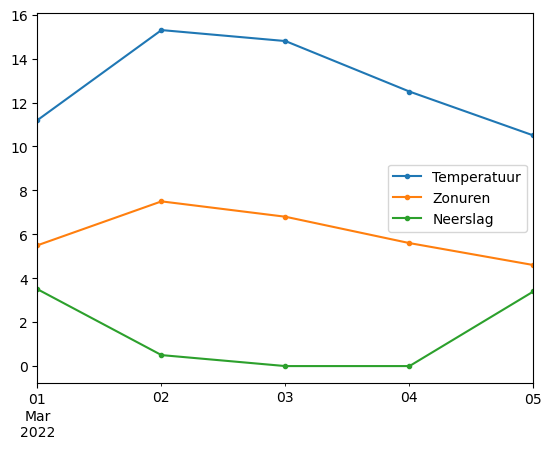

In [71]:
#Tip: Pandas plot geeft snel inzicht in de data
df.plot(marker=".")

In [72]:
# Met melt() transformeer je naar long-format.
# Merk: Kolomnaam komt in "variable", waarde in "value".
df.melt()

,variable,value
0,Temperatuur,11.2
1,Temperatuur,15.3
2,Temperatuur,14.8
3,Temperatuur,12.5
4,Temperatuur,10.5
5,Zonuren,5.5
6,Zonuren,7.5
7,Zonuren,6.8
8,Zonuren,5.6
9,Zonuren,4.6


In [73]:
# Behoud index door ignore_index op False te zetten
df.melt(ignore_index=False)

,variable,value
2022-03-01,Temperatuur,11.2
2022-03-02,Temperatuur,15.3
2022-03-03,Temperatuur,14.8
2022-03-04,Temperatuur,12.5
2022-03-05,Temperatuur,10.5
2022-03-01,Zonuren,5.5
2022-03-02,Zonuren,7.5
2022-03-03,Zonuren,6.8
2022-03-04,Zonuren,5.6
2022-03-05,Zonuren,4.6


In [74]:
# Gebruik var_name en value_name om kolomnamen aan te passen
df.melt(
    var_name="Meting",
    value_name="Waarde",
)

,Meting,Waarde
0,Temperatuur,11.2
1,Temperatuur,15.3
2,Temperatuur,14.8
3,Temperatuur,12.5
4,Temperatuur,10.5
5,Zonuren,5.5
6,Zonuren,7.5
7,Zonuren,6.8
8,Zonuren,5.6
9,Zonuren,4.6


In [77]:
# Voeg datum toe als kolom
df = df.assign(Datum=df.index).reset_index(drop=True)
df

,Temperatuur,Zonuren,Neerslag,Datum
0,11.2,5.5,3.5,2022-03-01
1,15.3,7.5,0.5,2022-03-02
2,14.8,6.8,0.0,2022-03-03
3,12.5,5.6,0.0,2022-03-04
4,10.5,4.6,3.4,2022-03-05


In [78]:
# Gebruik id_vars en value_vars om kolommen op te geven
df.melt(
    
    id_vars=["Datum"],
    value_vars=["Temperatuur", "Neerslag"],
    
    var_name="Meting",
    value_name="Waarde",
)

,Datum,Meting,Waarde
0,2022-03-01,Temperatuur,11.2
1,2022-03-02,Temperatuur,15.3
2,2022-03-03,Temperatuur,14.8
3,2022-03-04,Temperatuur,12.5
4,2022-03-05,Temperatuur,10.5
5,2022-03-01,Neerslag,3.5
6,2022-03-02,Neerslag,0.5
7,2022-03-03,Neerslag,0.0
8,2022-03-04,Neerslag,0.0
9,2022-03-05,Neerslag,3.4


## Pivot

In [79]:
# Maak long-format aan
df_long = df.melt(id_vars="Datum", var_name="Meting", value_name="Waarde")
df_long

,Datum,Meting,Waarde
0,2022-03-01,Temperatuur,11.2
1,2022-03-02,Temperatuur,15.3
2,2022-03-03,Temperatuur,14.8
3,2022-03-04,Temperatuur,12.5
4,2022-03-05,Temperatuur,10.5
5,2022-03-01,Zonuren,5.5
6,2022-03-02,Zonuren,7.5
7,2022-03-03,Zonuren,6.8
8,2022-03-04,Zonuren,5.6
9,2022-03-05,Zonuren,4.6


In [80]:
# Pivot naar wide-format
df_wide = df_long.pivot(
    index="Datum",
    columns="Meting",
    values="Waarde",
)
df_wide

Meting,Neerslag,Temperatuur,Zonuren
Datum,,,
2022-03-01,3.5,11.2,5.5
2022-03-02,0.5,15.3,7.5
2022-03-03,0.0,14.8,6.8
2022-03-04,0.0,12.5,5.6
2022-03-05,3.4,10.5,4.6


In [81]:
# Merk op: Naam van de index kolom behouden op index
df_wide.index

DatetimeIndex(['2022-03-01', '2022-03-02', '2022-03-03', '2022-03-04',
               '2022-03-05'],
              dtype='datetime64[ns]', name='Datum', freq=None)

In [82]:
# Merk op: Naam van de waarde kolom behouden op kolom index
df_wide.columns

Index(['Neerslag', 'Temperatuur', 'Zonuren'], dtype='object', name='Meting')